# # Import libraries

In [3]:
import pymysql
pymysql.install_as_MySQLdb()
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# # Add project directory path, establish database connection, and load data

In [4]:
# Add project directory path
sys.path.append(os.path.abspath(".."))

# Establish database connection
from database.db_connection import DatabaseConnector

# Error handling for database connection
try:
    # Establishing database connection
    db_connector = DatabaseConnector()
    engine = db_connector.get_engine()
except Exception as e:
    print(f"Error connecting to the database: {e}")
    sys.exit(1)  # Exit program on connection error

# Load data
try:
    forecast_df = pd.read_sql("SELECT * FROM historical_forecast;", engine)
    weather_df = pd.read_sql("SELECT * FROM historical_weather;", engine)
except Exception as e:
    print(f"Error loading data: {e}")
    sys.exit(1)  # Exit program on error

# Convert datetime format
try:
    weather_df['datetime'] = pd.to_datetime(weather_df['datetime'])
except Exception as e:
    print(f"Error in datetime formatting: {e}")
    sys.exit(1)

# Graphical EDA
print("Starting graphical analysis...")

Starting graphical analysis...


# # 1. Histograms: Distribution of temperature and wind speed

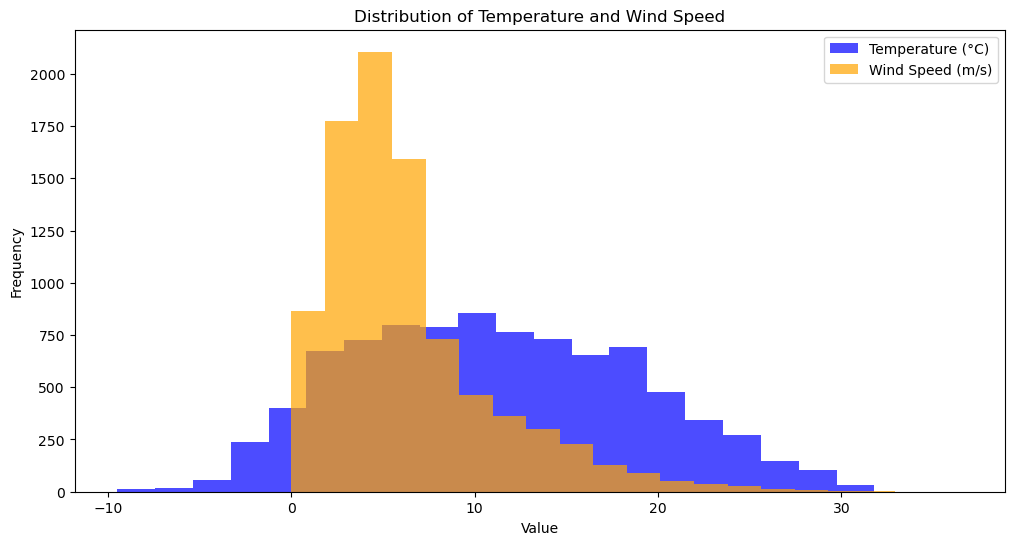

In [5]:
plt.figure(figsize=(12, 6))
plt.hist(weather_df['temperature_2m'], bins=20, alpha=0.7, label='Temperature (°C)', color='blue')
plt.hist(weather_df['wind_speed_10m'], bins=20, alpha=0.7, label='Wind Speed (m/s)', color='orange')
plt.title("Distribution of Temperature and Wind Speed")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## Interpretation

The temperature distribution shows how frequently certain temperature ranges occur, with possible peaks indicating common temperature ranges.

The wind speed distribution highlights the prevalence of different wind speeds. A narrow range may indicate stable wind conditions, while a wide range suggests variability.

# 2. Boxplot: Comparison of temperature distribution by month

C:\Users\fdrmi\AppData\Local\Temp\ipykernel_9880\2582838769.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=weather_df, x='month', y='temperature_2m', palette='coolwarm')


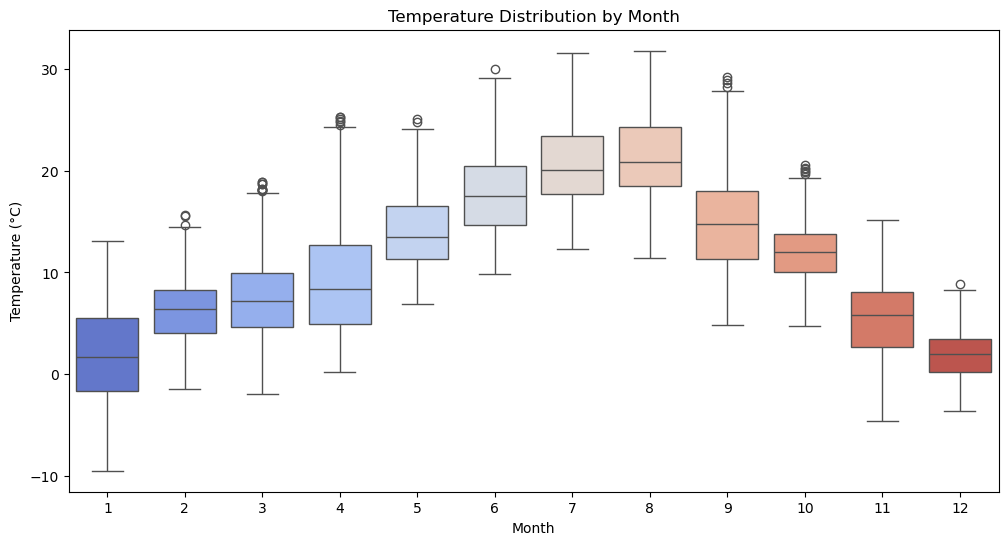

In [6]:
weather_df['month'] = weather_df['datetime'].dt.month
plt.figure(figsize=(12, 6))
sns.boxplot(data=weather_df, x='month', y='temperature_2m', palette='coolwarm')
plt.title("Temperature Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.show()

## Interpretation

The boxplot illustrates seasonal trends. Warmer months (e.g., June to August) show higher median temperatures, while colder months (e.g., December to February) have lower medians.

Outliers in the colder months might indicate unusual weather events or data irregularities.


# 3. Scatterplot: Relationship between temperature and relative humidity

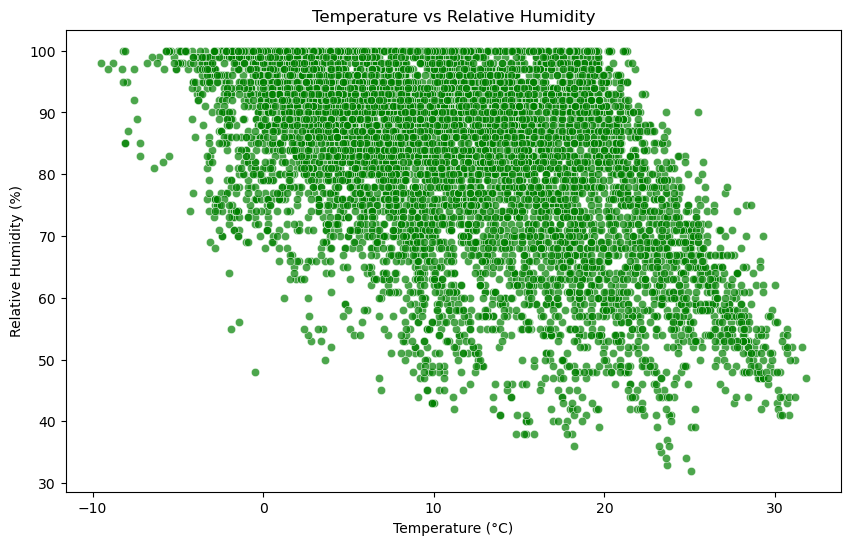

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weather_df, x='temperature_2m', y='relative_humidity_2m', alpha=0.7, color='green')
plt.title("Temperature vs Relative Humidity")
plt.xlabel("Temperature (°C)")
plt.ylabel("Relative Humidity (%)")
plt.show()


## Interpretation

A negative correlation might be observed, as higher temperatures often correspond to lower relative humidity.
Clustering of points can indicate typical weather conditions for the dataset's region.


# 4. Time series analysis: Temperature trends over time

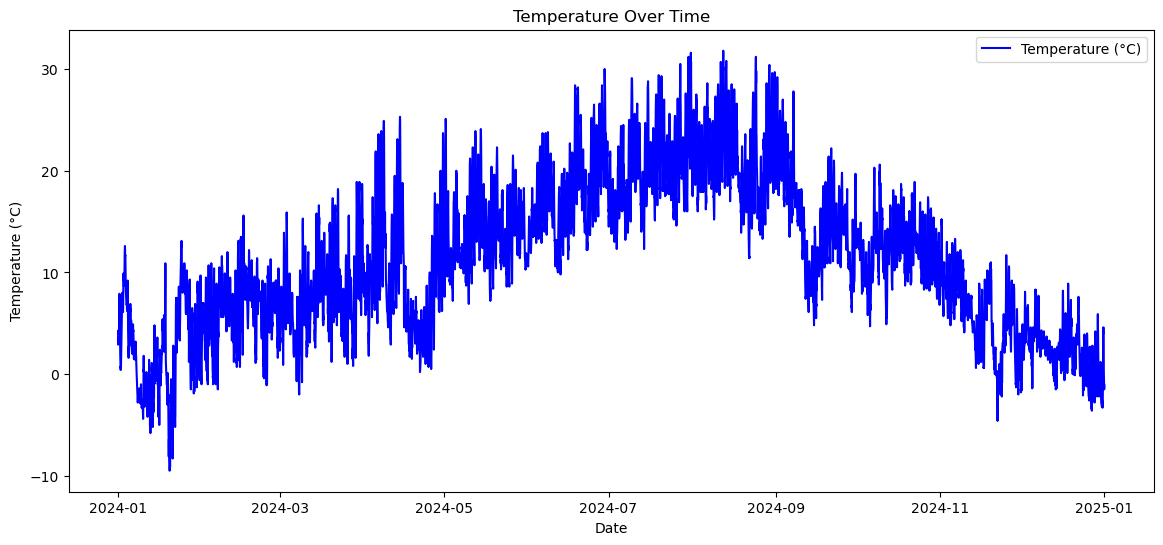

In [8]:
plt.figure(figsize=(14, 6))
plt.plot(weather_df['datetime'], weather_df['temperature_2m'], label='Temperature (°C)', color='blue')
plt.title("Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

## Interpretation

The time series plot highlights long-term trends, such as seasonal cycles or temperature anomalies.

Sudden peaks or dips could indicate specific weather events that merit further investigation.

## 5. Correlation Heatmap


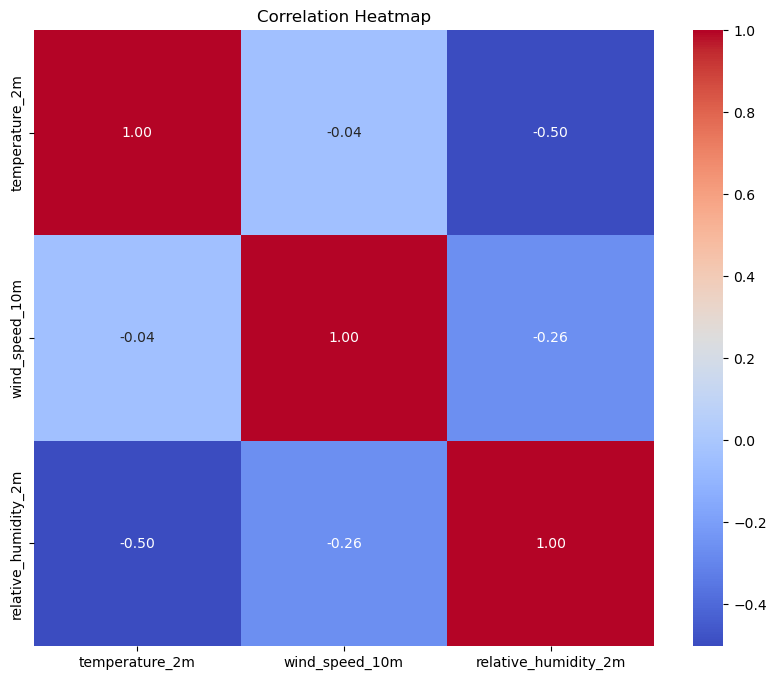

In [9]:
plt.figure(figsize=(10, 8))
correlation_matrix = weather_df[['temperature_2m', 'wind_speed_10m', 'relative_humidity_2m']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

## Interpretation

Correlation coefficients help identify relationships between variables.

For instance, a high correlation between temperature and wind speed might indicate wind-driven temperature changes, while a negative correlation with humidity aligns with physical weather principles.

## Summary of Findings:

The dataset reveals clear seasonal trends in temperature and humidity.

Temperature and humidity exhibit an expected inverse relationship.

Further exploration of outliers and unexpected trends (e.g., sudden temperature spikes) could provide deeper insights into regional weather patterns.